## Car Price Prediction 


In [138]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

In [2]:
import cufflinks as cf 
cf.go_offline() 
cf.set_config_file(offline=False, world_readable=True) ## links plotly directly to pandas 

In [3]:
df = pd.read_csv(r'~/Data Files/car_price_prediction.csv')

In [4]:
df 

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [5]:
df['Model'].isin(['-']).sum() 

0

In [6]:
for col in df: 
    print(df[col].isin(['-']).sum()) 

0
0
5819
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [7]:
df.rename(columns = {'Fuel type':'fuel_type', 'Leather interior': 'leather_interior', 
                    'Prod. year': 'prod_year', 'Engine volume':'engine_volume', 'Gear box type': 
                    'gear_box_type', 'Drive wheels': 'drive_wheels'}, inplace=True)

In [8]:
print('\033[1m',"Manufacturers", '\033[0m')
print(df['Manufacturer'].unique())
print('\033[1m',"\nProduction Year", '\033[0m')
print(sorted(df['prod_year'].unique())) 
print('\033[1m',"\nCar Category", '\033[0m')
print((df['Category'].value_counts())) 
print('\033[1m',"\nLeather Interior", '\033[0m')
print((df['leather_interior'].value_counts()))
print('\033[1m',"\nFuel Type", '\033[0m')
print((df['fuel_type'].value_counts())) 
print('\033[1m',"\nEngine Volume", '\033[0m')
print((df['engine_volume'].unique())) 
print('\033[1m',"\nCylinders", '\033[0m')
print((df['Cylinders'].value_counts())) 
print('\033[1m',"\nGear Box Type", '\033[0m')
print((df['gear_box_type'].value_counts())) 
print('\033[1m',"\nDrive Wheels", '\033[0m')
print((df['drive_wheels'].value_counts())) 
print('\033[1m',"\nColor", '\033[0m')
print((df['Color'].value_counts())) 
print('\033[1m',"\nDoors", '\033[0m')
print((df['Doors'].value_counts()))
print('\033[1m',"\nWheel", '\033[0m')
print((df['Wheel'].value_counts())) 
print('\033[1m',"\nAirbags", '\033[0m')
print((df['Airbags'].unique()))

 Manufacturers 
['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']
 
Production Year 
[1939, 1943, 1947, 1953, 1957, 1964, 1965, 1968, 1973, 1974, 1976, 1977, 1978, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
 
Car Category 
Sedan      

In [9]:
df.at[8541, 'Price']= 230000

In [10]:
manufacturer = df.groupby(df['Manufacturer'])['Price'].mean() 
manufacturer.iplot(kind='bar', title='Mean Price by Manufacturer')

In [11]:
prod_year = df.groupby(df['prod_year'])['Price'].mean() 
prod_year.iplot(kind='line', title='Mean Price by Production Year')

In [12]:
leather = df.groupby(df['leather_interior'])['Price'].mean() 
df_leather = pd.DataFrame({'labels': leather.index, 'values': leather.values})
df_leather.iplot(kind='pie', labels='labels', values='values')

In [13]:
fuel = df.groupby(df['fuel_type'])['Price'].mean() 
df_fuel = pd.DataFrame({'labels': fuel.index, 'values': fuel.values}) 
df_fuel.iplot(kind='bar', title='Fuel Type vs Price', x='labels', y='values')

In [14]:
cylinders = df.groupby(df['Cylinders'])['Price'].mean() 
df_cylinders = pd.DataFrame({'labels': cylinders.index, 'values': cylinders.values}) 
df_cylinders.iplot(kind='bar', title='Cyclinders vs Price', x='labels', y='values')

In [15]:
gear = df.groupby(df['gear_box_type'])['Price'].mean() 
df_gear = pd.DataFrame({'labels': gear.index, 'values': gear.values}) 
df_gear.iplot(kind='bar', title='Gear Box Type vs Price', x='labels', y='values') 

In [16]:
drive = df.groupby(df['drive_wheels'])['Price'].mean() 
df_drive = pd.DataFrame({'labels': drive.index, 'values': drive.values}) 
df_drive.iplot(kind='bar', title='Drive Wheels vs Price', x='labels', y='values')

In [17]:
color = df.groupby(df['Color'])['Price'].mean() 
df_color = pd.DataFrame({'labels': color.index, 'values': color.values}) 
df_color.iplot(kind='bar', title='Color vs Price', x='labels', y='values')

In [18]:
airbags = df.groupby(df['Airbags'])['Price'].mean() 
df_airbags = pd.DataFrame({'labels': airbags.index, 'values': airbags.values}) 
df_airbags.iplot(kind='bar', title='Airbags vs Price', x='labels', y='values')

In [19]:
df 

,ID,Price,Levy,Manufacturer,Model,prod_year,Category,leather_interior,fuel_type,engine_volume,Mileage,Cylinders,gear_box_type,drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [20]:
df['Mileage'] = df['Mileage'].str.replace('km', '')

In [21]:
df['Mileage'] = df['Mileage'].astype(int)

In [22]:
 df['engine_volume'].value_counts() 

2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: engine_volume, Length: 107, dtype: int64

In [23]:
df['engine_volume'] = df['engine_volume'].str.replace('Turbo', '')

In [24]:
df['engine_volume'] = df['engine_volume'].astype(float)

In [25]:
df[['Mileage', 'engine_volume','Price']].corr() 

,Mileage,engine_volume,Price
Mileage,1.000000,-0.006289,-0.001754
engine_volume,-0.006289,1.000000,0.008419
Price,-0.001754,0.008419,1.000000


(0.0, 80000.0)

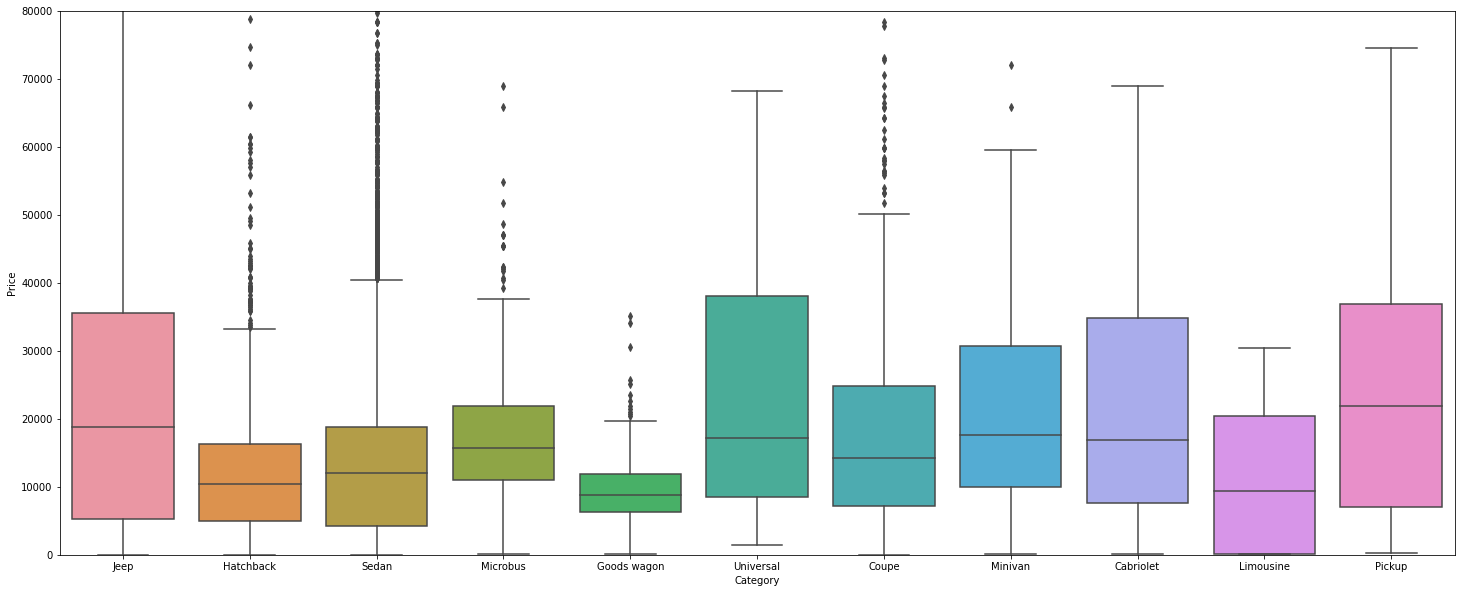

In [27]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,10))
sns.boxplot(x='Category', y='Price', data=df)
plt.ylim(0, 80000)



In [28]:
df 

,ID,Price,Levy,Manufacturer,Model,prod_year,Category,leather_interior,fuel_type,engine_volume,Mileage,Cylinders,gear_box_type,drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [29]:
from scipy import stats

In [34]:
stats.pearsonr(df['Price'], df['prod_year'])

(0.012738482265693078, 0.07726965791865197)

In [38]:
stats.pearsonr(df['Price'], df['engine_volume']) 

(0.008418592111637377, 0.24297517247867115)

In [39]:
stats.pearsonr(df['Price'], df['Cylinders'])

(0.007022044188353639, 0.3301117650891623)

In [40]:
stats.pearsonr(df['Price'], df['Airbags'])

(-0.012562578346266864, 0.08144653848864906)

In [60]:
df2 = df.copy() 

In [61]:
df2['leather_interior'] = df2['leather_interior'].map(lambda x:1 if x == 'Yes' else 0) 

In [64]:
stats.pointbiserialr(df2['leather_interior'], df['Price']) 

PointbiserialrResult(correlation=0.0006466349580096207, pvalue=0.9285408406812384)

In [69]:
grouped_test2=df2[['drive_wheels', 'Price']].groupby(['drive_wheels'])
grouped_test2.head(2) 

,drive_wheels,Price
0,4x4,13328
1,4x4,16621
2,Front,8467
4,Front,11726
10,Rear,941
11,Rear,8781


In [71]:
grouped_test2.get_group('4x4')['Price'] 

0        13328
1        16621
3         3607
9        26657
19         941
         ...  
19193     7527
19198    28225
19205     7500
19220     8467
19227    29793
Name: Price, Length: 4058, dtype: int64

In [74]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4x4')['Price'], grouped_test2.get_group('Front')['Price'], grouped_test2.get_group('Rear')['Price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   


ANOVA results: F= 0.09719623240929104 , P = 0.907378377375862


In [75]:
grouped_test3=df2[['fuel_type', 'Price']].groupby(['fuel_type'])
grouped_test3.head(2) 

,fuel_type,Price
0,Hybrid,13328
1,Petrol,16621
2,Petrol,8467
3,Hybrid,3607
5,Diesel,39493
10,Diesel,941
11,CNG,8781
12,CNG,3000
21,Plug-in Hybrid,20698
65,LPG,9722


In [76]:
grouped_test3.get_group('Hybrid')['Price']

0        13328
3         3607
6         1803
8         1098
13        1019
         ...  
19214     1176
19219    19444
19229       50
19230      470
19236      470
Name: Price, Length: 3578, dtype: int64

In [78]:
f_val, p_val = stats.f_oneway(grouped_test3.get_group('Hybrid')['Price'], 
                              grouped_test3.get_group('Petrol')['Price'], 
                              grouped_test3.get_group('Diesel')['Price'], 
                              grouped_test3.get_group('CNG')['Price'], 
                              grouped_test3.get_group('Plug-in Hybrid')['Price'], 
                              grouped_test3.get_group('LPG')['Price'])
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 4.928547313576603 , P = 0.00016430539639346756


In [81]:
grouped_test4=df2[['gear_box_type', 'Price']].groupby(['gear_box_type'])

In [84]:
f_val, p_val = stats.f_oneway(grouped_test4.get_group('Automatic')['Price'], 
                              grouped_test4.get_group('Tiptronic')['Price'], 
                              grouped_test4.get_group('Variator')['Price'], 
                              grouped_test4.get_group('Manual')['Price'])
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 3.468430323123709 , P = 0.015435337941633553


In [90]:
grouped_test5=df2[['Wheel', 'Price']].groupby(['Wheel'])

In [94]:
f_val, p_val = stats.f_oneway(grouped_test5.get_group('Left wheel')['Price'], 
                              grouped_test5.get_group('Right-hand drive')['Price'])
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 4.1039452866202275 , P = 0.042797045438984445


In [96]:
grouped_test6=df2[['Color', 'Price']].groupby(['Color'])

In [99]:
f_val, p_val = stats.f_oneway(grouped_test6.get_group('Silver')['Price'], 
                              grouped_test6.get_group('Black')['Price'], 
                              grouped_test6.get_group('White')['Price'], 
                              grouped_test6.get_group('Grey')['Price'], 
                              grouped_test6.get_group('Blue')['Price'], 
                              grouped_test6.get_group('Green')['Price'],
                              grouped_test6.get_group('Red')['Price'], 
                              grouped_test6.get_group('Sky blue')['Price'],
                              grouped_test6.get_group('Orange')['Price'], 
                              grouped_test6.get_group('Yellow')['Price'],
                              grouped_test6.get_group('Brown')['Price'], 
                              grouped_test6.get_group('Golden')['Price'],
                              grouped_test6.get_group('Beige')['Price'], 
                              grouped_test6.get_group('Carnelian red')['Price'], 
                              grouped_test6.get_group('Purple')['Price'], 
                              grouped_test6.get_group('Pink')['Price']
                             )
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.7938763498437638 , P = 0.6859425711323444


In [102]:
df2['Doors'].unique()  

array(['04-May', '02-Mar', '>5'], dtype=object)

In [103]:
grouped_test7=df2[['Doors', 'Price']].groupby(['Doors']) 

In [104]:
f_val, p_val = stats.f_oneway(grouped_test7.get_group('04-May')['Price'], 
                              grouped_test7.get_group('02-Mar')['Price'],
                              grouped_test7.get_group('>5')['Price']
                             )
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 11.382136029793646 , P = 1.1474243682667781e-05


In [114]:
grouped_test8=df2[['Category', 'Price']].groupby(['Category']) 

In [117]:
f_val, p_val = stats.f_oneway(grouped_test8.get_group('Jeep')['Price'], 
                              grouped_test8.get_group('Hatchback')['Price'], 
                              grouped_test8.get_group('Sedan')['Price'], 
                              grouped_test8.get_group('Microbus')['Price'], 
                              grouped_test8.get_group('Goods wagon')['Price'], 
                              grouped_test8.get_group('Universal')['Price'],
                              grouped_test8.get_group('Coupe')['Price'], 
                              grouped_test8.get_group('Minivan')['Price'],
                              grouped_test8.get_group('Cabriolet')['Price'], 
                              grouped_test8.get_group('Limousine')['Price'], 
                              grouped_test8.get_group('Pickup')['Price'],
                             )
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 8.338030036726094 , P = 1.171784250860753e-13


### Building Model 

In [113]:
df['Category'].unique() 

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

In [226]:
features = df2[['Category', 'fuel_type', 'gear_box_type', 'drive_wheels', 'Doors', 
               'Wheel', 'Color']] 

In [123]:
df2['age'] = 2021 - df2['prod_year']

In [227]:
one_hot = pd.get_dummies(features[['Category', 'fuel_type', 'gear_box_type', 'drive_wheels', 'Doors', 'Wheel',
                                  'Color']]) 
features_updated = pd.concat([features, one_hot], axis=1) 
features_updated.drop(['Category', 'fuel_type', 'gear_box_type', 'drive_wheels', 'Doors', 'Wheel',
                       'Color'], axis=1, inplace=True)  

In [228]:
features_updated2 = features_updated.copy()  

In [229]:
features_updated2

,Category_Cabriolet,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19233,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
19234,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19235,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
Y = pd.Series(df2['Price']).to_numpy() 

In [231]:
X = features_updated2 

In [232]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2) 

In [233]:
lm = LinearRegression()  

In [241]:
lm.fit(X, Y)

LinearRegression()

In [242]:
yhat = lm.predict(X) 
yhat[0:5]

array([ 9088., 29696., 10112., 11904.,  9344.])

In [243]:
lm.intercept_ 

1.1099286525077339e+18

In [244]:
lm.coef_ 

array([ 3.98061808e+16,  3.98061808e+16,  3.98061808e+16,  3.98061808e+16,
        3.98061808e+16,  3.98061808e+16,  3.98061808e+16,  3.98061808e+16,
        3.98061808e+16,  3.98061808e+16,  3.98061808e+16,  1.10062895e+17,
        1.10062895e+17,  1.10062895e+17,  1.10062895e+17,  1.10062895e+17,
        1.10062895e+17,  1.10062895e+17, -1.44257178e+17, -1.44257178e+17,
       -1.44257178e+17, -1.44257178e+17, -7.40539777e+17, -7.40539777e+17,
       -7.40539777e+17, -9.74756630e+17, -9.74756630e+17, -9.74756630e+17,
        5.55808161e+16,  5.55808161e+16,  5.44175041e+17,  5.44175041e+17,
        5.44175041e+17,  5.44175041e+17,  5.44175041e+17,  5.44175041e+17,
        5.44175041e+17,  5.44175041e+17,  5.44175041e+17,  5.44175041e+17,
        5.44175041e+17,  5.44175041e+17,  5.44175041e+17,  5.44175041e+17,
        5.44175041e+17,  5.44175041e+17])

In [245]:
from sklearn.metrics import r2_score 

In [246]:
r2_score(Y, yhat)

0.007177441261571049

/home/lazydaemon29/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/home/lazydaemon29/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



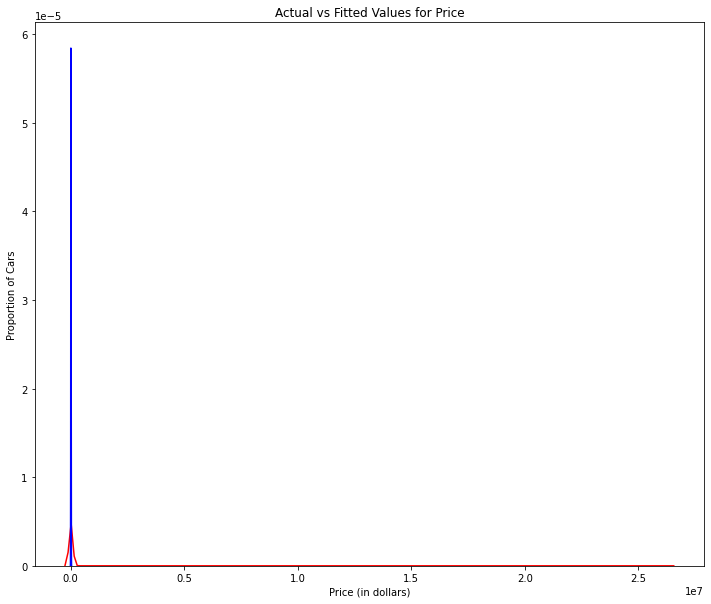

In [240]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close() 

